In [77]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
def calc_possibilities(t,n,a,b):
    sum = 0
    for k in range(n+1):
        if (n<k) or (t+n-1-a*n-k*(b-a+1)<(n-1)):
            term = 0
        else:
            term = ((-1)**k) * math.comb(n,k) * math.comb(t+n-1-a*n-k*(b-a+1),n-1)
        sum += term
    return sum

In [15]:
k = 2
a = 0
b = 800
((-1)**k) * math.comb(n,k) * math.comb(t+n-1-a*n-k*(b-a+1),n-1)

ValueError: n must be a non-negative integer

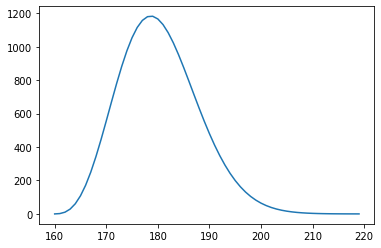

In [88]:
#number of noisy samples
t = 800
#number of folds
n = 5

#total combinations
total = calc_possibilities(800,5,0,800)

expect = 0
pdf = []
x_axis = []
for h in range(0,t-t//n+1):
    max_fold_samples = t//n + h
    b = t//n + h 
    a = 0
    term2 = math.comb(800,max_fold_samples)*math.comb(8000-800,1600-max_fold_samples)/math.comb(8000,1600)
    combs = calc_possibilities(t-max_fold_samples,n-1,0,b)
    pdf.append(combs*term2)
    # pdf.append(term2)
    x_axis.append(max_fold_samples)
plt.plot(x_axis[:60],pdf[:60])


In [101]:
with open("/home/vishwesh/Projects/ReCoV/results/memory_auc_cindex.npy","rb") as file:
    data = np.load(file)

In [100]:
data[174]

1.8035272860126235

In [102]:
np.argsort(data)    

array([324,  72,  12, 345, 135, 316, 208,  40,  10, 149,  58,   6, 257,
       173, 270,  16,  34, 194, 249,  54, 187, 169,  24, 215,  76,  11,
       246, 115, 180, 311, 330, 113,  49, 347,   8, 233,  33, 136, 111,
       328, 294, 226, 127, 321,  53, 231, 201, 239, 300, 269,  47, 267,
       119,  13, 236,  46,  20,  26,  79, 339,  97, 255, 309, 296,  35,
       317, 319, 243, 352, 144,  67, 373, 133, 354, 326,   9, 302, 142,
       178,  23, 303, 299,  70, 150, 384,  19, 109, 229, 332, 385, 285,
       387, 358, 281,  96, 283,  84,  68, 293, 218, 174, 195, 148,  88,
       128,   2,  55, 241, 125,  82, 158, 262, 368,  63, 333, 202,  73,
       235, 141, 331, 346, 315, 301, 284, 153, 348, 124,  69,  21, 313,
        50, 386, 225, 356, 329, 151, 375,  15, 227, 129, 120, 252, 273,
       378,  25, 170, 336,   3, 245, 132,  92, 102, 305, 362, 287,  45,
       193,  14, 376, 146, 188, 154, 364, 190, 264, 374, 343,  80, 310,
       198, 121, 272, 167, 147,   5, 359, 204,  28, 116,  83, 16

In [93]:
data_orig = data.copy()

In [80]:
term2

0.03714870533679382

In [81]:
combs

1

In [73]:
x_axis[np.argmax(pdf)]

179

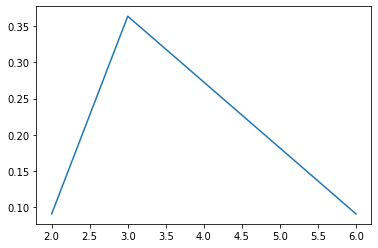

In [58]:
#number of noisy samples
t = 6
#number of folds
n = 3

#total combinations
total = calc_possibilities(t,n,0,t)

expect = 0
pdf = []
x_axis = []
for h in range(0,t-t//n+1):
    max_fold_samples = t//n + h
    b = t//n + h
    a = 0
    combs = calc_possibilities(t-max_fold_samples,n-1,0,b)
    pdf.append(combs)
    x_axis.append(max_fold_samples)
plt.plot(x_axis,pdf/np.sum(pdf))

In [61]:
total

28

In [63]:
101/28

3.607142857142857

In [49]:
pdf

[1, 4, 3, 2, 1]

In [59]:
np.sum([pdf[i]*x_axis[i]/np.sum(pdf) for i in range(len(pdf))])

3.818181818181818

In [34]:
calc_possibilities(10,2,0,10)

11

In [70]:
expectation = np.sum([pdf[i]*x_axis[i]/np.sum(pdf) for i in range(len(pdf))])

In [76]:
np.sqrt(np.sum([pdf[i]*((x_axis[i]-expectation)**2)/np.sum(pdf) for i in range(len(pdf))]))

7.583150019957587

In [71]:
expectation

180.34515560368985

In [29]:
expectation

73.32302430734661

In [21]:
t-t/n+1

641.0

In [19]:
calc_possibilities(20,4,0,10)

891